Protipo basado en el tutorial hecho por Pierre Megret en: https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial

**Creadores:**

*   Jose Pablo Mora Villalobos. Carné: B85326.
*   Roy Esteban Padilla Calderón. Carné: B85854.
*   Juan José Valverde Campos . Carné: B47200.

**Parte 1: Importaciones de librerías y obtención de corpus y pareos**

Se realiza las importaciones de las librerías a utilizar.  Esto resulta necesario para poder hacer correr adecuadamente el código respectivo.

Por otra parte, se debe de cargar la documentación y los pareos que quieren ser probados. Para este caso, se deben de cargar los documentos de las Normas Internacionales de Información Financiera (NIIF) y los pareos respectivos de estos.



In [ ]:
import re  # Para el preprocesamiento
import pandas as pd  # Para el manejo de datos
import io # Para poder enviar y descargar archivos de colab
from time import time  # Para obtener los tiempos de los procesamientos
from collections import defaultdict  # Para obtener las frecuencias de palabras
from random import randrange # Para el manejo de números aleatorios
import spacy  # Para el procesamiento del corpus

import logging
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO) # Para poder monitorear gensim a partir de un logging
from google.colab import files # Para poder guardar el archivo pdf en colab
!pip install pdfplumber
import pdfplumber  # Para realizar la lectura de archivos pdf y convertirlos en archivos csv.
import glob # Para acceder a directorios y poder obtener archivos

#Librería Gensim para el uso y entrenamiento del modelo Word2Vec
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser

#Librerias para el calculo de distancias entre vectores
import numpy as np
from scipy import spatial

# Librerias para la graficación
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


     |████████████████████████████████| 45 kB 1.7 MB/s 
     |████████████████████████████████| 5.6 MB 7.0 MB/s 
     |████████████████████████████████| 139 kB 58.8 MB/s 
     |████████████████████████████████| 1.9 MB 40.4 MB/s 
  Created wheel for pdfplumber: filename=pdfplumber-0.5.28-py3-none-any.whl size=32240 sha256=45788aeff6d7088cf4bb8cfddd654e31ac36b64a30faf9098bd40a8f77982727
  Stored in directory: /root/.cache/pip/wheels/f2/b1/a0/c0a77b756d580f53b3806ae0e0b3ec945a8d05fca1d6e10cc1
Successfully built pdfplumber


INFO - 18:07:20: 'pattern' package not found; tag filters are not available for English


In [ ]:
from google.colab import files # Para cargar archivos utilizando google colab en un entorno de trabajo
uploaded = files.upload()

Saving conceptual-framework-for-financial-reporting-pages-7-11,13-19,21-24,26-38,40-48,50-71,73-76,78-84.pdf to conceptual-framework-for-financial-reporting-pages-7-11,13-19,21-24,26-38,40-48,50-71,73-76,78-84.pdf
Saving ias-1-presentation-of-financial-statements-pages-6-42.pdf to ias-1-presentation-of-financial-statements-pages-6-42.pdf
Saving ias-7-statement-of-cash-flows-pages-4-16.pdf to ias-7-statement-of-cash-flows-pages-4-16.pdf
Saving ias-21-the-effects-of-changes-in-foreign-exchange-rates-pages-4-17.pdf to ias-21-the-effects-of-changes-in-foreign-exchange-rates-pages-4-17.pdf
Saving ias-23-borrowing-costs-pages-4-9.pdf to ias-23-borrowing-costs-pages-4-9.pdf
Saving ias-27-separate-financial-statements-pages-4-10.pdf to ias-27-separate-financial-statements-pages-4-10.pdf
Saving ias-28-investments-in-associates-and-joint-ventures-pages-4-16.pdf to ias-28-investments-in-associates-and-joint-ventures-pages-4-16.pdf
Saving ias-32-financial-instruments-presentation-pages-4-41.pdf to

**Parte 2: Procesamiento del corpus**

Tomando en consideración que la documentación que se agrega para procesar se encuentra en formato pdf, se debe de realizar un tratamiento del mismo para hacer convertido en un formato csv y posteriormente ya poder seguir con el proceso de limpieza al convertir el formato csv en vectores de textos.

In [ ]:
# Se indica la dirección donde se va a realizar la lectura de archivos (Esta es la dirección determinada de google colab)
arr_of_files = (glob.glob("/content/*.pdf"))
lines = ['Number','Values'] ## Inicialización para poder guardar una matriz donde el primer vector corresponde al numero de línea y el segundo al contenido de línea a procesar

def num_there(string):
  '''
    Metodo que recibe un string para poder obtener si dentro del mismo existe un numero dentro
  '''
  return any(i.isdigit() for i in string)

for file in arr_of_files:
  with pdfplumber.open(file) as pdf:
      finalLine = ''
      n = 0
      pages = pdf.pages
      for page in pdf.pages:
          text = page.extract_text() # Se extrae el texto
          if text is not None:
            text.replace("â€™", "") # Se elimina los simbolos â€™ que estaban dentro del corpus una vez que se convierte en csv
            text.replace(",", "") # Se elimina las ","
            for twoLines in text.split('\n'):
                for line in twoLines.split('\n'):
                  if (not "paragraph" in line and num_there(line)) : # Se determina que si la palabra parrafo no aparece en una línea y además tiene adentro un numero es que se acabó el párrafo (Esto por convención de NIIF)
                      lines.append(finalLine)
                      finalLine = ''

                finalLine = finalLine + ' ' + line
                n=n+1
df = pd.DataFrame(lines)


df.to_csv('corpus.csv') # Se obtiene el corpus en un csv


INFO - 18:31:46: xref found: pos=b'970543'
INFO - 18:31:46: read_xref_from: start=970543, token=/b'xref'
INFO - 18:31:46: xref objects: {1: (None, 17, 0), 2: (None, 390, 0), 3: (None, 12263, 0), 4: (None, 21271, 0), 5: (None, 28017, 0), 6: (None, 33013, 0), 7: (None, 33885, 0), 8: (None, 42000, 0), 9: (None, 49045, 0), 10: (None, 58230, 0), 11: (None, 60367, 0), 12: (None, 247578, 0), 13: (None, 566, 0), 14: (None, 11888, 0), 15: (None, 1112, 0), 16: (None, 1397, 0), 17: (None, 1511, 0), 18: (None, 12446, 0), 19: (None, 20897, 0), 20: (None, 12880, 0), 21: (None, 13175, 0), 22: (None, 13276, 0), 23: (None, 21861, 0), 24: (None, 27637, 0), 25: (None, 22356, 0), 26: (None, 28436, 0), 27: (None, 32661, 0), 28: (None, 28790, 0), 29: (None, 33486, 0), 30: (None, 34548, 0), 31: (None, 41620, 0), 32: (None, 35118, 0), 33: (None, 42463, 0), 34: (None, 48668, 0), 35: (None, 42890, 0), 36: (None, 49222, 0), 37: (None, 57840, 0), 38: (None, 49603, 0), 39: (None, 49889, 0), 40: (None, 49994, 0), 4

In [ ]:
df

,0
0,Number
1,Values
2,
3,IFRS 17
4,International Financial Reporting Standard 17...
...,...
5784,that amendment when it applies IFRS 16.
5785,29D Annual Improvements to IFRS Standards 201...
5786,1 January 2019. Earlier application is permit...
5787,Withdrawal of IAS 23 (revised 1993)


**Parte 3: Limpieza del corpus**

Se realiza una limpieza del texto procesado para que el mismo se le eliminen stopwords, se le cambien las palabras en mayúscula a minúscula y además se realice la lematización de las palabras.

In [ ]:
nlp = spacy.load('en', disable=['ner', 'parser']) # Se selecciona el idioma ingles y se desabilita el reconocimiento de entidades por rápidez

def cleaning(doc):
  '''
      Se realiza el proceso de lematización y se remueve los stopword a partir de un parrafo de la norma.
  '''
  txt = [token.lemma_ for token in doc if not token.is_stop]
  # Si la oración es de pocas palabras (dos en este caso), el beneficio es muy bajo,
  # lo que implica que no se pueda sacar mucho contexto de ellas. Por eso se eliminan.
  if len(txt) > 2:
      return ' '.join(txt)

# Limpieza rápida donde se eliminan palabras que no tengan símbolos que no sean letras
brief_cleaning = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df[0])
df[0]

0                                                  Number
1                                                  Values
2                                                        
3                                                  IAS 32
4        International Accounting Standard 32 Financia...
                              ...                        
5784     C21 This Standard supersedes the following St...
5785                                   (a) IAS 17 Leases;
5786     (b) IFRIC 4 Determining whether an Arrangemen...
5787          (c) SIC-15 Operating Leases—Incentives; and
5788     (d) SIC-27 Evaluating the Substance of Transa...
Name: 0, Length: 5789, dtype: object

In [ ]:
t = time()
# Limpieza profunda del dataset, incluye la lematización y eliminación de stopwords ( Realizando un llamado de la funcion cleaning definida en la seccion de código anterior)
txt = [cleaning(doc) for doc in nlp.pipe(brief_cleaning, batch_size=5000, n_threads=-1)]

print('Tiempo de limpieza profunda: {} mins'.format(round((time() - t) / 60, 2)))

Tiempo de limpieza profunda: 0.18 mins


In [ ]:
# Muestra Dataset limpio
txt

[None,
 None,
 None,
 None,
 '  international accounting standard financial instrument presentation objective',
 None,
 '  objective standard establish principle present financial instrument liability equity offset financial asset financial liability apply classification financial instrument perspective issuer financial asset financial liability equity instrument classification relate interest dividend loss gain circumstance financial asset financial liability offset',
 '  principle standard complement principle recognising',
 '  measure financial asset financial liability ifrs financial',
 '  instrument disclose information ifrs financial instrument disclosure scope',
 '  standard shall apply entity type financial instrument interest subsidiary associate joint venture',
 '  account accordance ifrs consolidated financial',
 '  statement ias separate financial statement ias investment',
 '  associate joint venture case ifrs',
 '  ias ias require permit entity account',
 '  interest subs

In [ ]:
df_clean = pd.DataFrame({'clean': txt}) # Para crear un dataframe con el cual trabajar
df_clean = df_clean.dropna().drop_duplicates() # Se elimina del dataframe oraciones que pueden estar juntas, para no alterar el modelo
df_clean.shape # Se muestra la dimensionalidad final del dataframe a utilizar

INFO - 03:58:39: NumExpr defaulting to 2 threads.


(4719, 1)

In [ ]:
df_clean

,clean
4,international accounting standard financial ...
6,objective standard establish principle prese...
7,principle standard complement principle reco...
8,measure financial asset financial liability ...
9,instrument disclose information ifrs financi...
...,...
5784,c standard supersede follow standard interpr...
5785,ias lease
5786,b ifric determine arrangement contain lease
5787,c sic operate lease incentive


**Parte 4: Generación del Modelo**

En esta parte se ingresan los parámetros para poder dar forma al modelo, con objetivo que en la siguiente parte el mismo pueda entrenarse.

In [ ]:
sent = [row.split() for row in df_clean['clean']] # Se obtiene un vector de vectores que contiene en el vector principal la frase o parrafo de la norma,en donde realmente dentro de este se encuentran todas las palabras de la frase o párrafo
# Se carga el corpus en el modelo de gensim de frases, esto ayuda a construir bigramas iniciales principalmente para mejorar el rendimiento del modelo
phrases = Phrases(sent, min_count=30, progress_per=10000)
bigram = Phraser(phrases)
sentences = bigram[sent] # Se obtiene el vector de vectores inicial pero con la mejora a nivel de gensim de lo mencionado con anterioridad

INFO - 03:58:39: collecting all words and their counts
INFO - 03:58:39: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 03:58:40: collected 51921 word types from a corpus of 157582 words (unigram + bigrams) and 4719 sentences
INFO - 03:58:40: using 51921 counts as vocab in Phrases<0 vocab, min_count=30, threshold=10.0, max_vocab_size=40000000>
INFO - 03:58:40: source_vocab length 51921
INFO - 03:58:40: Phraser built with 133 phrasegrams


In [ ]:
# Para conocer la cantidad de palabras que finalmente son las que tendría el modelo a entrenar
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

3047

In [ ]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10] # Obtiene las palabras más comunes dentro del corpus

['entity',
 'financial',
 'asset',
 'b',
 'paragraph',
 'shall',
 'instrument',
 'contract',
 'hedge',
 'liability']

In [ ]:
# Se ingresa los parámetros para entrenar el modelo, se destacan que se utiliza ventana de tamaño 5, 128 neuronas, arquitectura skip-gram y semilla con valor 1.
w2v_model = Word2Vec(min_count=2,
                     window=5,
                     size=128,
                     sample=6e-5,
                     alpha=0.01,
                     min_alpha=0.0007,
                     negative=20,
                     workers= 1,
                     sg=1,
                     seed = 1)

In [ ]:
# Se ingresa al modelo anterior el vocabulario que se va a utilizar.
t = time()
w2v_model.build_vocab(sentences, progress_per=10000)
print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 03:58:41: collecting all words and their counts
INFO - 03:58:41: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 03:58:41: collected 3047 word types from a corpus of 144012 raw words and 4719 sentences
INFO - 03:58:41: Loading a fresh vocabulary
INFO - 03:58:41: effective_min_count=2 retains 2354 unique words (77% of original 3047, drops 693)
INFO - 03:58:41: effective_min_count=2 leaves 143319 word corpus (99% of original 144012, drops 693)
INFO - 03:58:41: deleting the raw counts dictionary of 3047 items
INFO - 03:58:41: sample=6e-05 downsamples 864 most-common words
INFO - 03:58:41: downsampling leaves estimated 44000 word corpus (30.7% of prior 143319)
INFO - 03:58:41: estimated required memory for 2354 words and 128 dimensions: 3587496 bytes
INFO - 03:58:41: resetting layer weights


Time to build vocab: 0.02 mins


In [ ]:
## Deja el modelo listo para entrenarse para la siguiente sección
w2v_model.init_sims(replace=True)

INFO - 03:58:42: precomputing L2-norms of word weight vectors


**Parte 5: Entrenamiento del modelo**

Sección enfocada al entrenamiento del modelo con los parámetros fijados en el apartado anterior (modelo de 128 neuronas y 16 épocas).

El modelo entrenado es el que se va a utilizar en los posteriores apartados de pruebas para evaluar su eficacia entorno a las normativas contables.



In [ ]:
t = time()

#Entrenamiento del modelo con respecto a una cantidad de épocas definidas.
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=16, report_delay=1)

print('Tiempo de entrenamiento del modelo: {} mins'.format(round((time() - t) / 60, 2)))


INFO - 03:58:42: training model with 1 workers on 2354 vocabulary and 128 features, using sg=1 hs=0 sample=6e-05 negative=20 window=5
INFO - 03:58:43: EPOCH 1 - PROGRESS: at 90.06% examples, 37970 words/s, in_qsize 2, out_qsize 0
INFO - 03:58:43: worker thread finished; awaiting finish of 0 more threads
INFO - 03:58:43: EPOCH - 1 : training on 144012 raw words (43890 effective words) took 1.1s, 38844 effective words/s
INFO - 03:58:44: EPOCH 2 - PROGRESS: at 90.06% examples, 37669 words/s, in_qsize 1, out_qsize 0
INFO - 03:58:44: worker thread finished; awaiting finish of 0 more threads
INFO - 03:58:44: EPOCH - 2 : training on 144012 raw words (43773 effective words) took 1.1s, 38676 effective words/s
INFO - 03:58:45: EPOCH 3 - PROGRESS: at 82.88% examples, 36863 words/s, in_qsize 1, out_qsize 0
INFO - 03:58:45: worker thread finished; awaiting finish of 0 more threads
INFO - 03:58:45: EPOCH - 3 : training on 144012 raw words (44151 effective words) took 1.1s, 38771 effective words/s
IN

Tiempo de entrenamiento del modelo: 0.3 mins


**Parte 6: Procesamiento y limpieza del pareo**

Sección de métodos de limpieza y procesamiento del pareo que se van a utilizar en la parte de pruebas con los pareos.

**Importante:** Los pareos deben estar guardados en una carpeta con el nombre de **Pareos**.

In [ ]:
# Obtención de las direcciones de los pareos.
pareos = (glob.glob("/content/Pareos/*.xlsx"))

In [ ]:
index2word_set = set(w2v_model.wv.index2word)
def avg_feature_vector(sentence, model, num_features, index2word_set):
    '''
      Método para obtener el vector de una frase dada, recibe
      la frase a calcular, el modelo, cantidad de neuronas o características
      y diccionario de palabras.
    '''
    words = sentence.split()
    feature_vec = np.zeros((num_features, ), dtype='float32')
    n_words = 0
    for word in words:
        if word in index2word_set:
            n_words += 1
            feature_vec = np.add(feature_vec, model[word])
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec

In [ ]:
def lematizacion_sin_eliminacion(doc):
    '''
      Lematización y removida de stopwords o palabras que no aportan valor de contexto.
      Recibe de parámetro la frase a lematizar. A diferencia de la lematización del corpus
      aquí no se eliminan frases de menor a dos, esto porque pasan términos que suelen
      ser de una o dos, de igual forma con los conceptos.
    '''
    txt = [token.lemma_ for token in doc if not token.is_stop]
    if len(txt) > 0:
        return ' '.join(txt)

def limpieza_pareo(terminos_sucios, conceptos_sucios):
  '''
    Limpieza donde se limita a dejar únicamente las palabras, por tanto se eliminan caracteres
    como los signos de puntuación y se lematiza utilizando el método anterior.
    Recibe el vector de términos y el de conceptos.
  '''
  terminos_limpios = (re.sub("[^A-Za-z']+", ' ', str(term)).lower() for term in terminos_sucios)
  conceptos_limpios = (re.sub("[^A-Za-z']+", ' ', str(term)).lower() for term in conceptos_sucios)
  # Lematización y eliminación de stopwords
  terminos_lema = [lematizacion_sin_eliminacion(doc) for doc in nlp.pipe(terminos_limpios, batch_size=1000, n_threads=-1)]
  conceptos_lema = [lematizacion_sin_eliminacion(doc) for doc in nlp.pipe(conceptos_limpios, batch_size=1000, n_threads=-1)]
  return terminos_lema,conceptos_lema


In [ ]:
neuronas = 128
def get_probabilidad (palabra, concepto, modelo):
  '''
    Obtención de la probabilidad de un concepto y una palabra.
  '''
  index2word_set = set(modelo.wv.index2word)
  # Vector de probabilidades del término
  s1_afv = avg_feature_vector(palabra.lower(), model=modelo, num_features=neuronas, index2word_set=index2word_set)
  # Vector de probilidades del concepto
  s2_afv = avg_feature_vector(concepto.lower(), model=modelo, num_features=neuronas, index2word_set=index2word_set)
  # Cálculo de la distancia coseno entre los dos vectores la probabilidad o cercanía entre el concepto y el término.
  sim = 1 - spatial.distance.cosine(s1_afv, s2_afv)
  return sim

def get_matriz_probilidades_pareo(lista_palabras, lista_conceptos, modelo):
  '''
    Generación de la matriz de cercanía entre conceptos y términos del pareo.
    Las filas corresponden los términos y las columnas a los conceptos.
  '''
  matriz_prob = np.zeros((len(lista_palabras),len(lista_conceptos)))
  for index_palabra in range(len(lista_palabras)):
    palabra = lista_palabras[index_palabra]
    for index_concept in range(len(lista_conceptos)):
      concepto = lista_conceptos[index_concept]
      matriz_prob[index_palabra][index_concept] = get_probabilidad(palabra, concepto, modelo)
  return matriz_prob

def imprimir_pareo(lista_palabras, lista_conceptos):
  '''
    Recibe dos listas del mismo tanaño, parte de que estas ya estén ordenadas.
    Se utiliza para imprimir el pareo resuelto.
  '''
  if len(lista_palabras) != len(lista_conceptos):
    print("Error tamaños distintos.")
    return
  for index in range(len(lista_palabras)):
    print (str(index + 1) + ")" +str(lista_palabras[index]) + "\t-----\t" + str(lista_conceptos[index]))


In [ ]:
def check_pareo(terminos,solucion_conceptos, respuesta_conceptos):
  '''
    Revisión de correctitud del pareo, para esto parte de que el orden los términos no cambia,
    de esta forma se compara la solución dada por el modelo (solucion_conceptos) con las
    respuestas correctas (respuesta_conceptos), así se comparan estos dos últimos y se
    toma como incorrecto aquellos campos que no concuerden.
  '''
  aciertos = 0
  for index_concepto in range(len(solucion_conceptos)):
    if solucion_conceptos[index_concepto] == respuesta_conceptos[index_concepto]:
      # print("Correcto: " + terminos[index_concepto] + " concepto: "+ respuesta_conceptos[index_concepto])
      aciertos += 1
    else:
      a = 0 # variable para no tener problemas de compilación por el comentario de la impresión de las respuestas incorrectas
      # print("Incorrecto: ",str(terminos[index_concepto])," concepto solucion: ", str(solucion_conceptos[index_concepto]), " respuesta dada: ",respuesta_conceptos[index_concepto])
  print ("Aciertos: " + str(aciertos) + " Fallos: "+ str(len(terminos)-aciertos))
  return aciertos, (len(terminos)-aciertos)

**Parte 7: Pruebas con palabras puntuales**

Parte de pruebas básicas del modelo con palabras puntuales.

Se realizan pruebas tales como encontrar las palabras más similares o cercanas a una palabra y calcular la simulitud o cercanía entre dos de ellas, también se pone a prueba que dada una secuencia de términos se muestre cuál de estos no concuerda en significado con los otros, incluso se resuelven analogías.

Todo esto es para observar la compresión que está teniendo el prototipo sobre el corpus brindado.



In [ ]:
# Prueba de palabras cercanas a una dada
w2v_model.wv.most_similar(positive = ["asset"])

[('derecognition', 0.7000778913497925),
 ('way', 0.6975539922714233),
 ('practically', 0.6880151033401489),
 ('acquire', 0.6722595691680908),
 ('valuable', 0.6693142652511597),
 ('derecognise', 0.6666445136070251),
 ('twice', 0.6638599634170532),
 ('involvement', 0.6636693477630615),
 ('simultaneous', 0.662420392036438),
 ('automatically', 0.6592708230018616)]

In [ ]:
# Prueba de similaridad entre dos palabras
w2v_model.wv.similarity("equity", 'liability')

0.57695895

In [ ]:
# Prueba para mostrar cuál de los términos de la lista no concuerda en significado
w2v_model.wv.doesnt_match(['liability', 'asset', 'equity'])

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'equity'

In [ ]:
# Prueba de analogías
w2v_model.wv.most_similar(positive=["right", "obligation"], negative=["asset"], topn=10)

[('party', 0.6511143445968628),
 ('redeem', 0.5965917110443115),
 ('extinguish', 0.5796452760696411),
 ('conditional', 0.5787534713745117),
 ('debtor', 0.5739107131958008),
 ('arrangement', 0.5728781819343567),
 ('currently', 0.571048378944397),
 ('insolvency', 0.5692565441131592),
 ('entitle', 0.5652256011962891),
 ('act', 0.5634195804595947)]

**Parte 8: Prueba del modelo con los pareos.**

En este apartado se pone a prueba el modelo corriendo los pareos de prueba. Los resultados se muestran en pantalla con el nombre del pareo, la cantidad de aciertos y fallos. Además, estos se guardan en un archivo csv con el nombre “ResultadosPareos.csv”.

In [ ]:
lista_metricas = [] # Lista de resultados para el CSV
corte_nombre = 16 #corte de cadena para el csv de pruebas
total_aciertos = 0
total_fallos = 0

# Recorrido por pareo para poner a prueba el modelo.
for archivo in pareos:
  pareo = pd.read_excel(archivo)
  terminos_sucios = pareo['Palabra'].to_list()
  conceptos_sucios = pareo['Concepto'].to_list()
  # Llamados para la limpieza del pareo
  terminos_limpios, conceptos_limpios = limpieza_pareo(terminos_sucios, conceptos_sucios)
  #Obtención de matriz de probabilidades o cercanía entre los conceptos y pareos
  matriz_concep = get_matriz_probilidades_pareo(terminos_limpios, conceptos_limpios,w2v_model)
  len_mat = len(matriz_concep[0])
  respuesta_pareo = [0] * len(matriz_concep[0])
  '''
    Procesamiento de la matriz de cercanía.
    Se busca por la mayor probabilidad para guardarlo como una respuesta.
    Una vez que se guarda, se pone en ceros la fila y columna asociada para
    seguir el procesamiento de las siguientes probabilidades.
  '''
  print("Matriz conceptos:", matriz_concep)
  for i in range(len_mat):
    por_may = np.argmax(matriz_concep)
    fila = por_may//len_mat
    col = por_may%len_mat
    matriz_concep[fila] = np.zeros((len_mat))
    matriz_concep[:,col]= np.zeros((len_mat))
    respuesta_pareo[fila] = conceptos_limpios[col]
  # Impresión de los datos de aciertos y fallos del pareo
  print("\nNombre del pareo:", archivo[corte_nombre:len(archivo)])
  aciertos, fallos = check_pareo(terminos_limpios, conceptos_limpios, respuesta_pareo)
  total_aciertos += aciertos
  total_fallos += fallos
  # Se agregan los datos a la lista del csv
  lista_metricas.append({'NombrePareo': archivo[corte_nombre:len(archivo)], 'aciertos' : aciertos, 'fallos' : fallos})

print("\nResumen: \nTotal de aciertos: " + str(total_aciertos) + "\tTotal de fallos: " + str(total_fallos))
# Generación del archivo csv con los resultados.
df = pd.DataFrame(lista_metricas, columns=['NombrePareo', 'aciertos','fallos'])
df.to_csv('ResultadosPareos.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


Matriz conceptos: [[0.89314979 0.62769687 0.48910093 0.75170147 0.700845   0.64939487
  0.57363605 0.75813478]
 [0.67458707 0.78591251 0.60218823 0.7084927  0.69869214 0.69686097
  0.74189126 0.73279256]
 [0.64269274 0.59553605 0.82932788 0.68783015 0.63711411 0.72902197
  0.60475874 0.60072958]
 [0.60091841 0.4605642  0.66314769 0.71677119 0.69773638 0.62669569
  0.49071401 0.56495279]
 [0.61694413 0.54782134 0.50047135 0.64321238 0.67444229 0.63575846
  0.51628625 0.52373642]
 [0.66968173 0.598481   0.59722835 0.70261854 0.65494913 0.81758022
  0.61086172 0.54816091]
 [0.66821235 0.86104584 0.57411849 0.69377023 0.66430676 0.7189756
  0.84691501 0.71709543]
 [0.79011792 0.58038723 0.61672407 0.7448588  0.76140684 0.60628361
  0.58729434 0.81183964]]

Nombre del pareo: nic 21, 23, 3,11,33,.xlsx
Aciertos: 6 Fallos: 2
Matriz conceptos: [[0.77164924 0.66344905 0.65846843 0.6679076  0.65400755 0.66611665
  0.56036097 0.65846843]
 [0.74897301 0.77130812 0.67121863 0.71835071 0.65340352 0.6

**Parte 9: Prueba de épocas de 1 a n para un modelo en específico**

Parte dedicada a entrenar el modelo en diferentes configuraciones de épocas, para esto se empieza corriendo el modelo desde 1 épocas a n épocas, de esta forma se puede observar en qué cantidad de estas el modelo obtiene mejores resultados. Dado que la impresión de estos valores puede ser muy grande, únicamente se guarda en un archivo csv con el nombre de "ResultadosPorEpocas.csv".

Esta parte es para encontrar la mejor configuración de épocas para un modelo, todo esto sin afectar el que ya se tiene.

In [ ]:
# Obtención de las columnas de palabras y conceptos del pareo.
lista_metricas = []
max_epocas = 20
# Modelo de pruebas para no interferir con el generado en el anterior
modelo_epocas = Word2Vec(min_count=2,
                     window=5,
                     size=128,
                     sample=6e-5,
                     alpha=0.01,
                     min_alpha=0.0007,
                     negative=20,
                     workers= 1,
                     sg=1,
                     seed = 1)
modelo_epocas.build_vocab(sentences, progress_per=10000)
modelo_epocas.init_sims(replace=True)
lista_metricas = []

for epoca in range(max_epocas):
  # Entrenamiento por época actual.
  modelo_epocas.train(sentences, total_examples=modelo_epocas.corpus_count, epochs=(epoca+1), report_delay=1)
  # Recorrido por pareo para poner a prueba el modelo.
  for archivo in pareos:
    pareo = pd.read_excel(archivo)
    terminos_sucios = pareo['Palabra'].to_list()
    conceptos_sucios = pareo['Concepto'].to_list()
    # Llamados para la limpieza del pareo
    terminos_limpios, conceptos_limpios = limpieza_pareo(terminos_sucios, conceptos_sucios)
    #Obtención de matriz de probabilidades o cercanía entre los conceptos y pareos
    matriz_concep = get_matriz_probilidades_pareo(terminos_limpios, conceptos_limpios,modelo_epocas)
    len_mat = len(matriz_concep[0])
    respuesta_pareo = [0] * len(matriz_concep[0])
    '''
      Procesamiento de la matriz de cercanía.
      Se busca por la mayor probabilidad para guardarlo como una respuesta.
      Una vez que se guarda, se pone en ceros la fila y columna asociada para
      seguir el procesamiento de las siguientes probabilidades.
  '''
    for i in range(len_mat):
      por_may = np.argmax(matriz_concep)
      fila = por_may//len_mat
      col = por_may%len_mat
      matriz_concep[fila] = np.zeros((len_mat))
      matriz_concep[:,col]= np.zeros((len_mat))
      respuesta_pareo[fila] = conceptos_limpios[col]
    aciertos, fallos = check_pareo(terminos_limpios, conceptos_limpios, respuesta_pareo)
    # Se agregan los datos a la lista del csv
    lista_metricas.append({'epocas': (epoca+1),'NombrePareo': archivo[corte_nombre:len(archivo)], 'aciertos' : aciertos, 'fallos' : fallos})

# Generación del archivo csv con los resultados.
df = pd.DataFrame(lista_metricas, columns=['epocas', 'NombrePareo','aciertos','fallos'])
df.to_csv('ResultadosPorEpocas.csv')


INFO - 03:59:00: collecting all words and their counts
INFO - 03:59:00: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 03:59:01: collected 3047 word types from a corpus of 144012 raw words and 4719 sentences
INFO - 03:59:01: Loading a fresh vocabulary
INFO - 03:59:01: effective_min_count=2 retains 2354 unique words (77% of original 3047, drops 693)
INFO - 03:59:01: effective_min_count=2 leaves 143319 word corpus (99% of original 144012, drops 693)
INFO - 03:59:01: deleting the raw counts dictionary of 3047 items
INFO - 03:59:01: sample=6e-05 downsamples 864 most-common words
INFO - 03:59:01: downsampling leaves estimated 44000 word corpus (30.7% of prior 143319)
INFO - 03:59:01: estimated required memory for 2354 words and 128 dimensions: 3587496 bytes
INFO - 03:59:01: resetting layer weights
INFO - 03:59:01: precomputing L2-norms of word weight vectors
INFO - 03:59:01: training model with 1 workers on 2354 vocabulary and 128 features, using sg=1 hs=0 sample=6

**Parte 10: Graficación**

Sección tomada de https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial.

En esta sección se muestra un gráfico de las palabras cercanas (Azul) y las lejanas (Verdes) entorno a una palabra dada.

In [ ]:

%matplotlib inline
sns.set_style("darkgrid")

def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, neuronas), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)

    # gets list of most similar words
    close_words = model.wv.most_similar([word])

    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)

    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)

    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=2).fit_transform(arrays) # IIII CHANGED n_components = 50 to 2 to begin to

    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)

    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)

    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})

    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)

    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )

    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)


    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)

    plt.title('t-SNE visualization for {}'.format(word.title()))

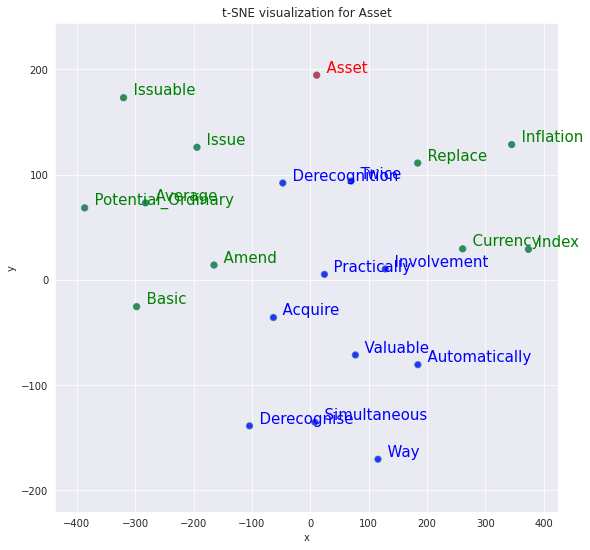

In [ ]:
tsnescatterplot(w2v_model, 'asset', [i[0] for i in w2v_model.wv.most_similar(negative=["asset"])]) #Verde -> Opuesto